<a href="https://colab.research.google.com/github/ehsanjafarimehako/AI_Codes/blob/main/NewKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
import keras
import numpy as np
import cv2 as cv
import random
import matplotlib.pyplot as plt

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="VdwBRxsJsFmCMW94xJjd")
project = rf.workspace("object-detection-yolov5").project("plate_ocr_ir")
dataset = project.version(2).download("folder")

In [ ]:
#upload .rar of dataset
!sudo apt-get install unrar
!unrar x /content/Plate_Chars_dataset.rar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unrar is already the newest version (1:5.6.6-2build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:

#resize images to specific size
from PIL import Image
import os

# Set the input and output directories
input_dir = "/content/valid"
output_dir =  "/content/output/valid"

# Set the target size
target_size = (28, 28)

def resize_images(input_dir, output_dir):
    # Loop through all files in the input directory
    for filename in os.listdir(input_dir):
        # Get the full path of the file
        file_path = os.path.join(input_dir, filename)
        # Check if the file is a directory
        if os.path.isdir(file_path):
            # If the file is a directory, recursively call this function on the subdirectory
            resize_images(file_path, os.path.join(output_dir, filename))
        # Check if the file is an image
        elif filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
            # Open the image file using PIL
            image = Image.open(file_path)
            # Resize the image to the target size
            resized_image = image.resize(target_size)
            # Save the resized image to the output directory
            # If the output directory does not exist, create it
            if not os.path.exists(output_dir):
                os.makedirs(output_dir)
            resized_image.save(os.path.join(output_dir, filename))

# Call the resize_images function on the input directory
resize_images(input_dir, output_dir)

In [ ]:
train_path = "/content/output/train"
valid_path = "/content/output/valid"
test_path = "/content/output/test"

In [ ]:
#updata class names here and in the final run code
class_names = subdirs = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'alef', 'ayn', 'be', 'dal', 'ghaf', 'he2', 'jim', 'lam', 'mim', 'non', 'sad', 'sin', 'ta', 'vav', 'ye' ]
num_classes = len(class_names)

In [ ]:
labels_nums = [i for i in range(0,len(class_names))]
print(labels_nums)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [ ]:
train_imgs = []
train_labels = []
for indx, subdir in enumerate(subdirs):
  imgfolder = os.path.join(train_path, subdir)
  for imgname in os.listdir(imgfolder):
    img = cv.imread(os.path.join(imgfolder, imgname), 0)
    train_imgs.append(img)
    train_labels.append(labels_nums[indx])

c = list(zip(train_imgs, train_labels))
random.shuffle(c)
train_imgs, train_labels = zip(*c)

train_images = np.array(train_imgs)
train_labels = np.array(train_labels)

In [ ]:
valid_imgs = []
valid_labels = []
for indx, subdir in enumerate(subdirs):
  imgfolder = os.path.join(valid_path, subdir)
  if os.path.exists(imgfolder):
    for imgname in os.listdir(imgfolder):
      img = cv.imread(os.path.join(imgfolder, imgname), 0)
      valid_imgs.append(img)
      valid_labels.append(labels_nums[indx])

c = list(zip(valid_imgs, valid_labels))
random.shuffle(c)
valid_imgs, valid_labels = zip(*c)

test_images = np.array(valid_imgs)
test_labels = np.array(valid_labels)

8
8


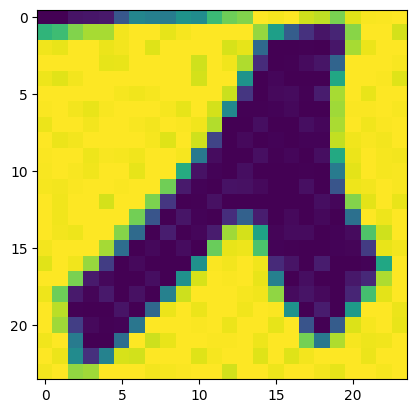

In [ ]:
num=0
print(class_names[train_labels[num]])
print(train_labels[num])
plt.imshow(train_images[num])

In [ ]:
test_labels.shape

(2097,)

In [ ]:
train_images=np.array(list(filter(lambda x: x is not None, train_images)))

<ipython-input-88-f75403956f27>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_images=np.array(list(filter(lambda x: x is not None, train_images)))


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(24, 24)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=200)


Epoch 1/200
544/544 [==============================] - 7s 3ms/step - loss: 0.2245 - accuracy: 0.9450
Epoch 2/200
544/544 [==============================] - 2s 3ms/step - loss: 0.0364 - accuracy: 0.9906
Epoch 3/200
544/544 [==============================] - 2s 3ms/step - loss: 0.0242 - accuracy: 0.9938
Epoch 4/200
544/544 [==============================] - 2s 3ms/step - loss: 0.0184 - accuracy: 0.9945
Epoch 5/200
544/544 [==============================] - 2s 4ms/step - loss: 0.0161 - accuracy: 0.9957
Epoch 6/200
544/544 [==============================] - 2s 4ms/step - loss: 0.0113 - accuracy: 0.9966
Epoch 7/200
544/544 [==============================] - 2s 3ms/step - loss: 0.0110 - accuracy: 0.9967
Epoch 8/200
544/544 [==============================] - 2s 3ms/step - loss: 0.0095 - accuracy: 0.9971
Epoch 9/200
544/544 [==============================] - 2s 3ms/step - loss: 0.0074 - accuracy: 0.9979
Epoch 10/200
544/544 [==============================] - 2s 3ms/step - loss: 0.0040 - accura

In [ ]:

predictions = model.predict(test_images)


66/66 [==============================] - 0s 2ms/step


In [ ]:
model.save('saved_model/simple_ocr_plates_model')

In [ ]:
!zip -r /content/saved_model/simple_ocr_plates_model.zip /content/saved_model/simple_ocr_plates_model

  adding: content/saved_model/simple_ocr_plates_model/ (stored 0%)
  adding: content/saved_model/simple_ocr_plates_model/assets/ (stored 0%)
  adding: content/saved_model/simple_ocr_plates_model/fingerprint.pb (stored 0%)
  adding: content/saved_model/simple_ocr_plates_model/variables/ (stored 0%)
  adding: content/saved_model/simple_ocr_plates_model/variables/variables.data-00000-of-00001 (deflated 20%)
  adding: content/saved_model/simple_ocr_plates_model/variables/variables.index (deflated 57%)
  adding: content/saved_model/simple_ocr_plates_model/keras_metadata.pb (deflated 84%)
  adding: content/saved_model/simple_ocr_plates_model/saved_model.pb (deflated 87%)


In [ ]:
ocr_model = tf.keras.models.load_model('/content/saved_model/simple_ocr_plates_model')

In [ ]:
test_img_path = "/content/test/he2/10788.jpg"
test_img = cv.imread(test_img_path, 0)
test_img = np.expand_dims(test_img, axis=0)
predictions = ocr_model.predict(test_images)

66/66 [==============================] - 0s 3ms/step


In [ ]:
class_names[np.argmax(predictions[0])]

'6'

In [ ]:
test_imgs = []
test_labels = []
for indx, subdir in enumerate(subdirs):
  imgfolder = os.path.join(test_path, subdir)
  if os.path.exists(imgfolder):
    for imgname in os.listdir(imgfolder):
      img = cv.imread(os.path.join(imgfolder, imgname), 0)
      test_imgs.append(img)
      test_labels.append(labels_nums[indx])

c = list(zip(test_imgs, test_labels))
random.shuffle(c)
test_imgs, test_labels = zip(*c)

test_images = np.array(test_imgs)
test_labels = np.array(test_labels)

In [ ]:

predictions = ocr_model.predict(test_images)

66/66 [==============================] - 0s 2ms/step


7
7


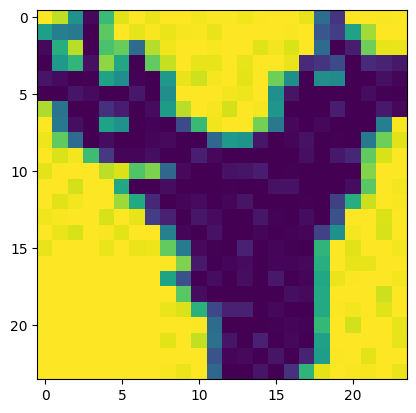

In [ ]:
num=126
print(class_names[np.argmax(predictions[num])])
print(np.argmax(predictions[num]))
plt.imshow(test_images[num])

66/66 [==============================] - 0s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

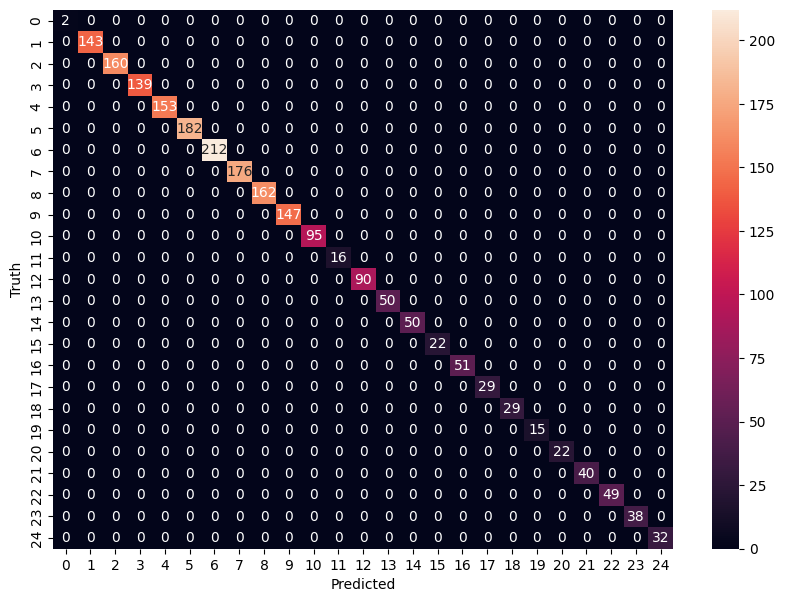

In [ ]:
y_predicted = model.predict(test_images)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=test_labels, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')